   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

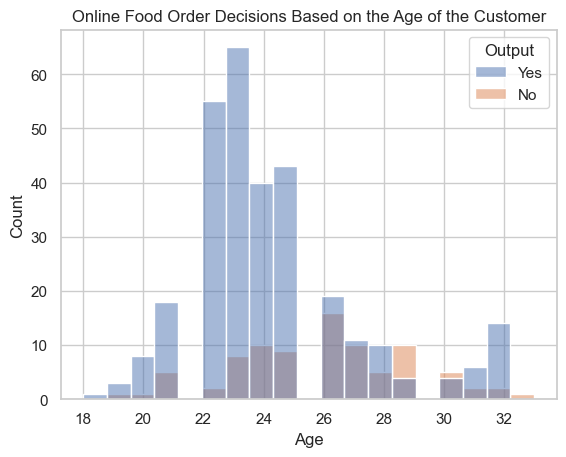

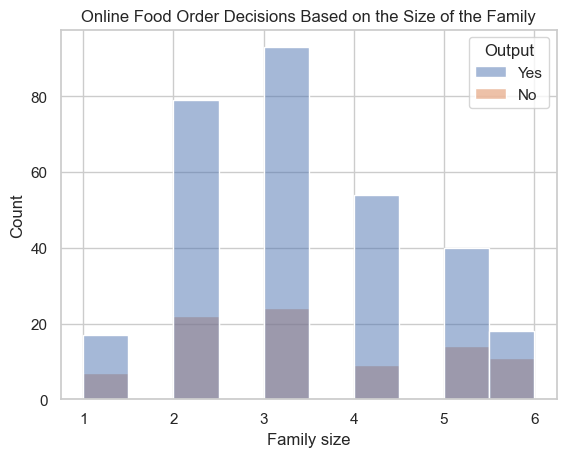

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

C:\Users\OGHENE-OVO\AppData\Local\Temp\ipykernel_4252\1797092604.py:104: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9487179487179487
Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 18
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 1
Monthly Income: 1000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 5
Family Size: 1
Pin Code: 5555
Review of the Last Order (1 = Positive, 0 = Negative): 1
Finding if the customer will order again:  ['Yes']


In [23]:
#Online Food Order Prediction with Machine Learning
#https://thecleverprogrammer.com/2022/06/07/online-food-order-prediction-with-machine-learning/

#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#reading dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')
print(dataset.head())
print(dataset.info())
print(dataset.describe())
correlation = dataset.corr()
print(correlation)

#visualizizng dataset
plt.title('Online Food Order Decisions Based on the Age of the Customer')
sns.histplot(x = 'Age', hue = 'Output', data=dataset)
plt.show()

plt.title('Online Food Order Decisions Based on the Size of the Family')
sns.histplot(x = 'Family size', hue = 'Output', data = dataset)
plt.show()

#dataset for costumers who ordered more than once
re_ordered_dataset = dataset.query("Output == 'Yes'")
print(re_ordered_dataset.head())

#examining the gender column to determine who orders more 
gender = re_ordered_dataset["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

#examining the marital status column to determine who orders more
marital = re_ordered_dataset["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

#examining the income column to determine who orders more
income = re_ordered_dataset["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

#converting features to numerical values for training dataset
dataset["Gender"] = dataset["Gender"].map({"Male": 1, "Female": 0})
dataset["Marital Status"] = dataset["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
dataset["Occupation"] = dataset["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
dataset["Educational Qualifications"] = dataset["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
dataset["Monthly Income"] = dataset["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
dataset["Feedback"] = dataset["Feedback"].map({"Positive": 1, "Negative ": 0})
print(dataset.head())

#splitting and training dataset
X = np.array(dataset[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(dataset[["Output"]])


x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))